In [3]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country, total_cases from corona20200515 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
total_cases =[]
total = []
for country, totalcases in cursor:
    countries.append(country)
    cases = totalcases.replace(',','')
    cases_int = int(cases)
    total_cases.append(cases_int)
    
cursor.close()
connector.close()

In [4]:
import pandas as pd

df = pd.DataFrame({'Total Cases': total_cases},countries)
df

,Total Cases
USA,1457649
Spain,274367
Russia,262843
UK,233151
Italy,223096
Brazil,203165
France,178870
Germany,174975
Turkey,144749
Iran,114533


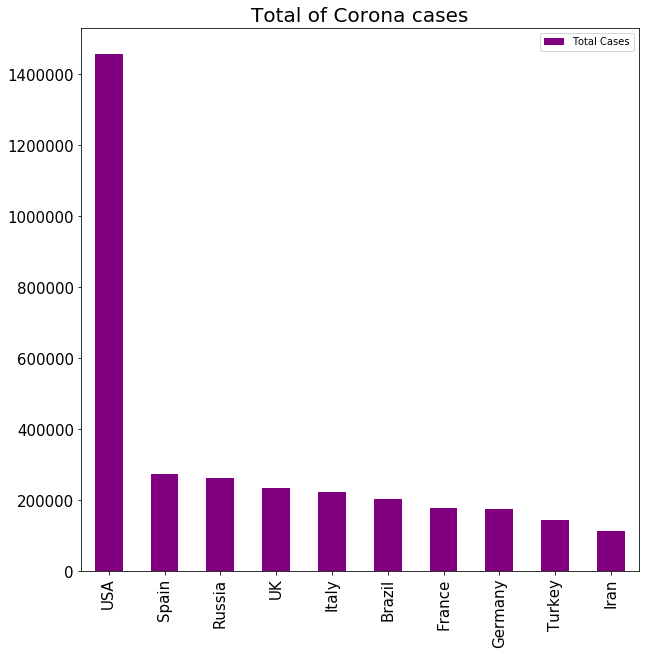

In [11]:
import matplotlib.pyplot as plt

df.plot.bar(figsize=(10,10), color='purple')

plt.title('Total of Corona cases', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()
#plt.savefig('total_cases_2020-05-15.jpg')